## How a regression network is traditionally trained

This network is trained using a data set $D = ({{\bf x}^{(n)}, {\bf t}^{(n)}})$ by adjusting ${\bf w}$ so as to minimize an error function, e.g.,

$$
E_D({\bf w}) = \sum_n\sum_i (y_i({\bf x}^{(n)};{\bf w}) - t_i^{(n)})^2
$$

This objective function is a sum of terms, one for each input/target pair $\{ {\bf x}, {\bf t} \}$, measuring how close the output ${\bf y}({\bf x}; {\bf w})$ is to the target ${\bf t}$:

$$
E_D({\bf w}) = \sum_n E_{\bf x}^{(n)}, \quad E_{\bf x}^{(n)}=\sum_i (y_i({\bf x}^{(n)};{\bf w}) - t_i^{(n)})^2
$$



This minimization is based on repeated evaluation of the gradient of $E_D$. This gradient can be efficiently computed using the backpropagation algorithm which uses the chain rule to find the derivatives, as we discuss below.

Often, regularization (also known as weight decay) is included, modifying
the objective function to:

$$
M({\bf w})=\alpha E_D({\bf w}) + \beta E_W({\bf w}),
$$
where $E_W = \frac{1}{2}\sum_i w_i^2$.




### Gradient descent
(From Wikipedia)
Cool animations at http://www.benfrederickson.com/numerical-optimization/

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

Gradient descent is based on the observation that if the multi-variable function $ F(\mathbf {x} )$ is defined and differentiable in a neighborhood of a point $ \mathbf {a}$ , then $ F(\mathbf {x} )$ decreases fastest if one goes from $ \mathbf {a}$ in the direction of the negative gradient of $F$ at $ \mathbf {a}$ , $ -\nabla F(\mathbf {a} )$. It follows that, if

$$\mathbf {a} _{n+1}=\mathbf {a} _{n}-\eta \nabla F(\mathbf {a} _{n})$$ 

for $\eta$  small enough, then $F(\mathbf {a_{n}} )\geq F(\mathbf {a_{n+1}} )$. In other words, the term $\eta \nabla F(\mathbf {a} )$ is subtracted from $ \mathbf {a}$  because we want to move against the gradient, namely down toward the minimum. With this observation in mind, one starts with a guess $\mathbf {x} _{0}$ for a local minimum of $F$, and considers the sequence $\mathbf {x} _{0},\mathbf {x} _{1},\mathbf {x} _{2},\dots$  such that

$${x} _{n+1}=\mathbf {x} _{n}-\gamma _{n}\nabla F(\mathbf {x} _{n}),\ n\geq 0.$$

We have

$F(\mathbf {x} _{0})\geq F(\mathbf {x} _{1})\geq F(\mathbf {x} _{2})\geq \cdots$ ,
so hopefully the sequence $(\mathbf {x} _{n})$ converges to the desired local minimum. Note that the value of the step size $\eta$  is allowed to change at every iteration.

This process is illustrated in the adjacent picture. Here $F$ is assumed to be defined on the plane, and that its graph has a bowl shape. The blue curves are the contour lines, that is, the regions on which the value of $F$ is constant. A red arrow originating at a point shows the direction of the negative gradient at that point. Note that the (negative) gradient at a point is orthogonal to the contour line going through that point. We see that gradient descent leads us to the bottom of the bowl, that is, to the point where the value of the function $F$ is minimal.

<img src="figures/Gradient_descent.png" style="width: 350px;"/>
#### Illustration of the gradient descept procedure on a series of iterations down a bowl shaped surface

The "Zig-Zagging" nature of the method is also evident below, where the gradient descent method is applied to $$F(x,y)=\sin \left({\frac {1}{2}}x^{2}-{\frac {1}{4}}y^{2}+3\right)\cos(2x+1-e^{y})$$


0.3226478037930326 1.602369170618785


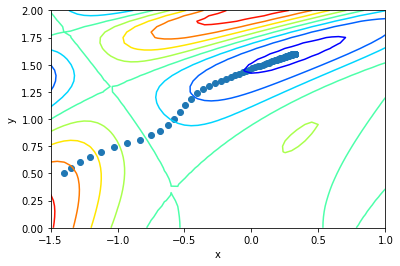

In [4]:
%matplotlib inline
from matplotlib import pyplot
pyplot.rcParams['image.cmap'] = 'jet'
import numpy as np

x0 = -1.4
y0 = 0.5
x = [x0] # The algorithm starts at x0, y0
y = [y0] 

eta = 0.1 # step size multiplier
precision = 0.00001

def f(x,y):
    f1 = x**2/2-y**2/4+3
    f2 = 2*x+1-np.exp(y)
    return np.sin(f1)*np.cos(f2)

def gradf(x,y):
    f1 = x**2/2-y**2/4+3
    f2 = 2*x+1-np.exp(y)
    dx = np.cos(f1)*np.cos(f2)*x-np.sin(f1)*np.sin(f2)*2.
    dy = np.cos(f1)*np.cos(f2)*(-y/2.)-np.sin(f1)*np.sin(f2)*(-np.exp(y))
    return (dx,dy)

err = 100.
while err > precision:
    (step_x, step_y) = gradf(x0, y0)
    x0 -= eta*step_x
    y0 -= eta*step_y
    x.append(x0)
    y.append(y0)
    err = eta*(abs(step_x)+abs(step_y))


print(x0,y0)

#### All this below is just to visualize the process
dx = 0.05
dy = 0.05
xx = np.arange(-1.5, 1.+dx, dx)
yy = np.arange(0., 2.+dy, dy)
V = np.zeros(shape=(len(yy),len(xx)))

for iy in range(0,len(yy)):
    for ix in range(0,len(xx)):
        V[iy,ix] = f(xx[ix],yy[iy])

X, Y = np.meshgrid(xx, yy)
pyplot.contour(X, Y, V)

#pyplot.plot(x,y,linestyle='--', lw=3);
pyplot.scatter(x,y);

pyplot.ylabel("y")
pyplot.xlabel("x");

### Stochastic gradient descent (SGD)

Stochastic gradient descent (often shortened to SGD), also known as incremental gradient descent, is a stochastic approximation of the gradient descent optimization and iterative method for minimizing an objective function that is written as a sum of differentiable functions. 

There are a number of challenges in applying the gradient descent rule. To understand what the problem is, let's look back at the quadratic cost $E_D$. Notice that this cost function has the form $E=\sum_n E_{\bf x}^{(n)}$
In practice, to compute the gradient $\nabla E_D$
 we need to compute the gradients $\nabla E_{\bf x}^{(n)}$
 separately for each training input, ${\bf x^{(n)}}$
and then average them.
. Unfortunately, when the number of training inputs is very large this can take a long time, and learning thus occurs slowly.

Stochastic gradient descent can be used to speed up learning. The idea is to estimate the gradient $\nabla E$
 by computing $\nabla E_{\bf x}$
for a small sample of randomly chosen training inputs. By averaging over this small sample it turns out that we can quickly get a good estimate of the true gradient.

<!--To make these ideas more precise, stochastic gradient descent works by randomly picking out a small number $m$
 of randomly chosen training inputs. We'll label those random training inputs ${\bf x^{(1)},x^{(2)},…,x^{(m)}}$
, and refer to them as a mini-batch. Provided the sample size m
 is large enough we expect that the average value of the $\nabla E_x$
 will be roughly equal to the average over all of them, that is
$$\frac{1}{m}\sum _{j=1}^m \nabla E_{x^{j}} \approx \frac{1}{n}\sum _{j=1}^n \nabla E_{x^{j}}$$
where the second sum is over the entire set of training data. 
!-->

To connect this explicitly to learning in neural networks, suppose $w_k$
 and $b_l$
 denote the weights and biases in our neural network. Then stochastic gradient descent works by picking out a randomly chosen mini-batch of training inputs, and training with those,
$$
w_k \rightarrow w_k - \eta \sum_{j=1}^m \frac{\partial{E_{\bf x}^{(j)}}}{\partial w_k}
$$

$$
b_l \rightarrow b_l - \eta \sum_{j=1}^m \frac{\partial{E_{\bf x}^{(j)}}}{\partial b_l}
$$

where the sums are over all the training examples in the current mini-batch. Then we pick out another randomly chosen mini-batch and train with those. And so on, until we have exhausted the training inputs, which is said to complete an epoch of training. At that point we start over with a new training epoch.

The pseudocode would look like:

`Choose an initial vector of parameters` $w$ `and learning rate` $\eta$.

`Repeat until an approximate minimum is obtained:`
```
    Randomly shuffle examples in the training set.
    For i=1,2,...,n , do:
```
$\quad \quad \quad \quad \quad w:=w-\eta \nabla E_{i}(w).$ 


### Example: linear regression

As seen previously, the objective function to be minimized is:

$$
\begin{aligned}
E(w)=\sum _{i=1}^{n}E_{i}(w)=\sum _{i=1}^{n}\left(w_{1}+w_{2}x_{i}-y_{i}\right)^{2}.
\end{aligned}
$$

And the gradent descent equations can be written in matrix form as:

$$
\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}:={\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}}-\eta {\begin{bmatrix}2(w_{1}+w_{2}x_{i}-y_{i})\\2x_{i}(w_{1}+w_{2}x_{i}-y_{i})\end{bmatrix}}.
$$

We'll generate a series of 100 random points aligned more or less along the line $y=a+bx$ with $a=1$ and $b=2$


1.1637760980701564 2.001777141438794


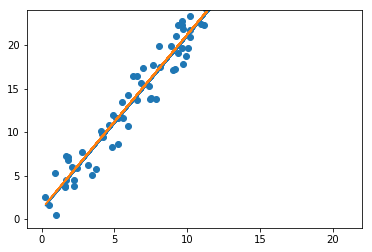

In [5]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np

a = 1
b = 2
num_points = 100
np.random.seed(637163) # we make sure we always generate the same sequence
x_data = np.random.rand(num_points)*20.
y_data = x_data*b+a+3*(2.*np.random.rand(num_points)-1)

pyplot.scatter(x_data,y_data)
pyplot.plot(x_data, b*x_data+a)

#### Least squares fit
sum_x = np.sum(x_data)
sum_y = np.sum(y_data)
sum_x2 = np.sum(x_data**2)
sum_xy = np.sum(x_data*y_data)
det = num_points*sum_x2-sum_x**2
fit_a = (sum_y*sum_x2-sum_x*sum_xy)/det
fit_b = (num_points*sum_xy-sum_x*sum_y)/det
print(fit_a,fit_b)

pyplot.xlim(-1,22)
pyplot.ylim(-1,24)
pyplot.plot(x_data, fit_b*x_data+fit_a);

We now write an SGD code for this problem. The training_data is a list of tuples `(x, y)` representing the training inputs and corresponding desired outputs. The variables `epochs` and `mini_batch_size` are what you'd expect - the number of epochs to train for, and the size of the mini-batches to use when sampling. `eta` is the learning rate, $\eta$. If the optional argument `test_data` is supplied, then the program will evaluate the network after each epoch of training, and print out partial progress. This is useful for tracking progress, but slows things down substantially.

The code works as follows. In each epoch, it starts by randomly shuffling the training data, and then partitions it into mini-batches of the appropriate size. This is an easy way of sampling randomly from the training data. Then for each `mini_batch` we apply a single step of gradient descent. This is done by the code `self.update_mini_batch(mini_batch, eta)`, which updates the coefficients according to a single iteration of gradient descent, using just the training data in `mini_batch`.

In [8]:
epochs = 1000
mini_batch_size = 10
eta = 0.01/mini_batch_size

a = 3.
b = 3.
def update_mini_batch(mini_batch, eta):
    global a, b
    a0 = a
    b0 = b
    for x, y, in mini_batch:
        e = eta*(a0+b0*x-y)
        a -= e
        b -= x*e
    
training_data = list(zip(x_data,y_data))
for j in range(epochs):
    np.random.shuffle(training_data)
    mini_batches = [training_data[k:k+mini_batch_size]
                    for k in range(0, len(training_data), mini_batch_size)]
    for mini_batch in mini_batches:
        update_mini_batch(mini_batch, eta)
    print ("Epoch {0}: {1} {2}".format(j,a,b))

Epoch 0: 2.851091506514999 1.7876531781856742
Epoch 1: 2.827178748563592 1.963573397229449
Epoch 2: 2.7801714492150196 1.8619634110879069
Epoch 3: 2.756668947213542 2.0288955459781213
Epoch 4: 2.7076355088367525 1.880872788736252
Epoch 5: 2.6709938639494206 1.9094861291196814
Epoch 6: 2.6459565191117687 2.083968448182042
Epoch 7: 2.592571941252409 1.867303977943171
Epoch 8: 2.5668650012203917 1.9282486257504263
Epoch 9: 2.5260855862259803 1.8254093290530535
Epoch 10: 2.4977119308055653 1.8393082159024072
Epoch 11: 2.461504007375818 1.8187446556619598
Epoch 12: 2.440510503849123 1.9639665902712513
Epoch 13: 2.4192661745417667 2.056408083610859
Epoch 14: 2.3778520184589746 1.9200785689241224
Epoch 15: 2.352636754920605 1.9557702061187
Epoch 16: 2.32668522997869 1.985365726392641
Epoch 17: 2.29093524056995 1.9302755099169442
Epoch 18: 2.264373631096743 1.9014850942257417
Epoch 19: 2.240116842945883 1.935758005663645
Epoch 20: 2.2192529930462856 2.0084713102139746
Epoch 21: 2.1882155215215

Epoch 816: 1.1686166547942265 2.0558238071783412
Epoch 817: 1.1601948873090822 2.010241210464497
Epoch 818: 1.150618385029723 1.9258408855428137
Epoch 819: 1.1636429174708893 2.0233682903580497
Epoch 820: 1.1622884142555794 2.0014636002126447
Epoch 821: 1.1555748556733847 1.906875567540085
Epoch 822: 1.1664335200140223 2.0571278055304023
Epoch 823: 1.1583224588173926 1.9869757506956676
Epoch 824: 1.1702089173813757 2.1543993462777062
Epoch 825: 1.1616518864819756 2.0773275184740485
Epoch 826: 1.1551967684697095 2.0063270888888423
Epoch 827: 1.152287628406903 1.9779246087420448
Epoch 828: 1.157850677359235 2.057287178586857
Epoch 829: 1.1556715647828006 2.0239885485233216
Epoch 830: 1.1565890096397193 2.0503171254560946
Epoch 831: 1.1595389084512515 1.98795193268577
Epoch 832: 1.1589800571798163 2.011033267696134
Epoch 833: 1.1556691202822504 1.9693737537898452
Epoch 834: 1.157665567164785 2.0208205094235487
Epoch 835: 1.1595353260212122 2.063046521990212
Epoch 836: 1.1557062861486722 1

### Challenge 14.2

Use SGD to train the single neuron in the previous notebook using a linearly separable set of 100 points, divided by the line $-\frac{5}{2}x+\frac{3}{2}y+3=0$ 

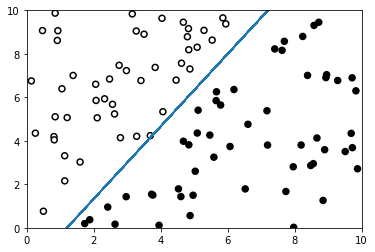

In [23]:
### We provide a set of randomly generated training points 
num_points = 100
w1 = -2.5
w2 = 1.5
w0 = 3.
np.random.seed(637163) # we make sure we always generate the same sequence
x_data = np.random.rand(num_points)*10.
y_data = np.random.rand(num_points)*10.
z_data = np.zeros(num_points)
for i in range(len(z_data)):
    if (y_data[i] > (-w0-w1*x_data[i])/w2):
        z_data[i] = 1.

pyplot.scatter(x_data,y_data,c=z_data,marker='o',linewidth=1.5,edgecolors='black')
pyplot.plot(x_data,(-w1*x_data-w0)/w2)
pyplot.gray()
pyplot.xlim(0,10)
pyplot.ylim(0,10);

You will need the following auxiliary functions:

In [25]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

## A simple network to classify handwritten digits
Most of this section has been taken from M. Nielsen's free on-line book: "Neural Networks and Deep Learning" http://neuralnetworksanddeeplearning.com/

In this section we discuss a neural network which can solve the more interesting and difficult problem, namely, recognizing individual handwritten digits.

The input layer of the network contains neurons encoding the values of the input pixels. Our training data for the network will consist of many 28 by 28
 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28
 neurons. The input pixels are greyscale, with a value of 0.0
 representing white, a value of 1.0
representing black, and in between values representing gradually darkening shades of grey.

The second layer of the network is a hidden layer. We denote the number of neurons in this hidden layer by $n$
, and we'll experiment with different values for $n$
. The example shown illustrates a small hidden layer, containing just $n=15$
 neurons.
 
 The output layer of the network contains 10 neurons. If the first neuron fires, i.e., has an output $\sim 1$
, then that will indicate that the network thinks the digit is a 0
. If the second neuron fires then that will indicate that the network thinks the digit is a 1
. And so on. A little more precisely, we number the output neurons from 0
 through 9
, and figure out which neuron has the highest activation value. If that neuron is, say, neuron number 6
, then our network will guess that the input digit was a 6
. And so on for the other output neurons.

<img src="figures/nnetwork.png" style="width: 500px;"/>

#### Network to identify single digits. The output layer has 10 neurons, one for each digit.



The first thing we'll need is a data set to learn from - a so-called training data set. We'll use the MNIST data set, which contains tens of thousands of scanned images of handwritten digits, together with their correct classifications. MNIST's name comes from the fact that it is a modified subset of two data sets collected by NIST, the United States' National Institute of Standards and Technology. Here's a few images from MNIST:

<img src="figures/digits_separate.png" style="width: 250px;"/>



The MNIST data comes in two parts. The first part contains 60,000 images to be used as training data. These images are scanned handwriting samples from 250 people, half of whom were US Census Bureau employees, and half of whom were high school students. The images are greyscale and 28 by 28 pixels in size. The second part of the MNIST data set is 10,000 images to be used as test data. Again, these are 28 by 28 greyscale images. We'll use the test data to evaluate how well our neural network has learned to recognize digits. To make this a good test of performance, the test data was taken from a different set of 250 people than the original training data (albeit still a group split between Census Bureau employees and high school students). This helps give us confidence that our system can recognize digits from people whose writing it didn't see during training.

In practice, we are going to split the data a little differently. We'll leave the test images as is, but split the 60,000-image MNIST training set into two parts: a set of 50,000 images, which we'll use to train our neural network, and a separate 10,000 image validation set.

We'll use the notation $x$
 to denote a training input. It'll be convenient to regard each training input $x$
 as a 28×28=784-dimensional vector. Each entry in the vector represents the grey value for a single pixel in the image. We'll denote the corresponding desired output by y=y(x)
, where y
 is a 10
-dimensional vector. For example, if a particular training image, $x$
, depicts a 6
, then $y(x)=(0,0,0,0,0,0,1,0,0,0)^T$
 is the desired output from the network. Note that T
 here is the transpose operation, turning a row vector into an ordinary (column) vector.
 

In [45]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

Note also that the biases and weights are stored as lists of Numpy matrices. So, for example `net.weights[1]` is a Numpy matrix storing the weights connecting the second and third layers of neurons. (It's not the first and second layers, since Python's list indexing starts at 0.) Since `net.weights[1]` is rather verbose, let's just denote that matrix $w$
. It's a matrix such that $w_{jk}$
 is the weight for the connection between the $k^{th}$
 neuron in the second layer, and the $j^{th}$
 neuron in the third layer. This ordering of the $j$
 and $k$
 indices may seem strange. The big advantage of using this ordering is that it means that the vector of activations of the third layer of neurons is:
$$a'=\mathrm {sigmoid}(wa+b)$$

There's quite a bit going on in this equation, so let's unpack it piece by piece. $a$
 is the vector of activations of the second layer of neurons. To obtain $a'$
 we multiply $a$
 by the weight matrix $w$
, and add the vector $b$
 of biases. We then apply the function `sigmoid`
elementwise to every entry in the vector $wa+b$.

Of course, the main thing we want our Network objects to do is to learn. To that end we'll give them an SGD method which implements stochastic gradient descent. 

<!--
The training_data is a list of tuples `(x, y)` representing the training inputs and corresponding desired outputs. The variables `epochs` and `mini_batch_size` are what you'd expect - the number of epochs to train for, and the size of the mini-batches to use when sampling. `eta` is the learning rate, $\eta$. If the optional argument `test_data` is supplied, then the program will evaluate the network after each epoch of training, and print out partial progress. This is useful for tracking progress, but slows things down substantially.

The code works as follows. In each epoch, it starts by randomly shuffling the training data, and then partitions it into mini-batches of the appropriate size. This is an easy way of sampling randomly from the training data. Then for each `mini_batch` we apply a single step of gradient descent. This is done by the code `self.update_mini_batch(mini_batch, eta)`, which updates the network weights and biases according to a single iteration of gradient descent, using just the training data in `mini_batch`.
-->

Most of the work is done by the line
```
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
```

This invokes something called the *backpropagation* algorithm, which is a fast way of computing the gradient of the cost function. So `update_mini_batch` works simply by computing these gradients for every training example in the `mini_batch`, and then updating `self.weights` and `self.biases` appropriately.

The activation $a_{lj}$
 of the $j^{th}$
 neuron in the $l^{th}$
layer is related to the activations in the $(l-1)^{th}$
 layer by the equation
$$a^l_j=\mathrm{sigmoid}(\sum_k w_{jk}^l a^{l-1}_k+b^l_j)$$
where the sum is over all neurons $k$
 in the $(l−1)^{th}$
 layer. To rewrite this expression in a matrix form we define a weight matrix $w^l$
 for each layer, $l$
. The entries of the weight matrix $w^l$
 are just the weights connecting to the $l^{th}$
 layer of neurons, that is, the entry in the $j^{th}$
 row and $k^{th}$
 column is $w^l_{jk}$. Similarly, for each layer $l$
 we define a bias vector, $b^l$. You can probably guess how this works - the components of the bias vector are just the values $b^l_j$
, one component for each neuron in the $l^{th}$
 layer. And finally, we define an activation vector $a^l$
whose components are the activations $a^l_j$.

With these notations in mind, these equations can be rewritten in the beautiful and compact vectorized form
$$a^l=\mathrm{sigmoid}(w^la^{l-1}+b^l).$$
This expression gives us a much more global way of thinking about how the activations in one layer relate to activations in the previous layer: we just apply the weight matrix to the activations, then add the bias vector, and finally apply the `sigmoid` function.

Apart from `self.backprop` the program is self-explanatory - all the heavy lifting is done in `self.SGD` and `self.update_mini_batch`, which we've already discussed. The `self.backprop` method makes use of a few extra functions to help in computing the gradient, namely sigmoid_prime, which computes the derivative of the sigmoid
 function, and `self.cost_derivative`. You can get the gist of these (and perhaps the details) just by looking at the code and documentation strings. Note that while the program appears lengthy, much of the code is documentation strings intended to make the code easy to understand. In fact, the program contains just 74 lines of non-whitespace, non-comment code. 

In [50]:
"""
network.py
~~~~~~~~~~

A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


We first load the MNIST data:

In [51]:
training_data, validation_data, test_data = load_data_wrapper()

After loading the MNIST data, we'll set up a Network with 30 hidden neurons. 

In [52]:
net = Network([784, 30, 10])

Finally, we'll use stochastic gradient descent to learn from the MNIST training_data over 30 epochs, with a mini-batch size of 10, and a learning rate of $\eta$=3.0:


In [53]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9125 / 10000
Epoch 1: 9201 / 10000
Epoch 2: 9285 / 10000
Epoch 3: 9317 / 10000
Epoch 4: 9299 / 10000
Epoch 5: 9388 / 10000
Epoch 6: 9394 / 10000
Epoch 7: 9397 / 10000
Epoch 8: 9425 / 10000
Epoch 9: 9395 / 10000
Epoch 10: 9408 / 10000
Epoch 11: 9440 / 10000
Epoch 12: 9448 / 10000
Epoch 13: 9460 / 10000
Epoch 14: 9445 / 10000
Epoch 15: 9459 / 10000
Epoch 16: 9467 / 10000
Epoch 17: 9466 / 10000
Epoch 18: 9434 / 10000
Epoch 19: 9450 / 10000
Epoch 20: 9463 / 10000
Epoch 21: 9472 / 10000
Epoch 22: 9465 / 10000
Epoch 23: 9482 / 10000
Epoch 24: 9487 / 10000
Epoch 25: 9458 / 10000
Epoch 26: 9481 / 10000
Epoch 27: 9479 / 10000
Epoch 28: 9476 / 10000
Epoch 29: 9479 / 10000


### Challenge 14.3
Try creating a network with just two layers - an input and an output layer, no hidden layer - with 784 and 10 neurons, respectively. Train the network using stochastic gradient descent. What classification accuracy can you achieve?

### Number of hidden layers

Suppose that we want to approximate a set of functions to a given accuracy. How many hidden layers do we need? The answer is: At most two layers, with arbitrary accuracy obtained given enough units per layer. It has been also shown that only one layer is enough to approximate any continuous function. Of course, there is no way to know how many units we would need, and this is not known in general, and this number may grow exponentially with the number of input units. 